# ENCARGO UNIDAD 2 PARTE 2



---

* Nombre: Daniela Ponce

# Sección 1 - Agrupamiento Jerárquico



---

Se utilizo el dataset wine limpiado previamente para este ejercicio.

Se cargan las librerias.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

Se cargan los datos

In [4]:
data2 = pd.read_csv('Wine1.csv')

In [5]:
data2.shape

(178, 13)

In [6]:
data2.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [7]:
data2.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

In [8]:
data2.head(10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


Aqui se selecionan algunos datos al azar para posteriormente verificar el clúster al que pertenecen

In [9]:
indices = [26, 110, 176]
muestras = pd.DataFrame(data2.loc[indices], 
columns = data2.keys()).reset_index(drop = True)

Se realiza el escalamiento de datos

In [10]:
data_escalada = preprocessing.Normalizer().fit_transform(data2)
muestras_escalada = preprocessing.Normalizer().fit_transform(muestras)

### ANÁLISIS DE MACHINE LEARNING ###

Se determina las variables a evaluar

In [11]:
X = data_escalada

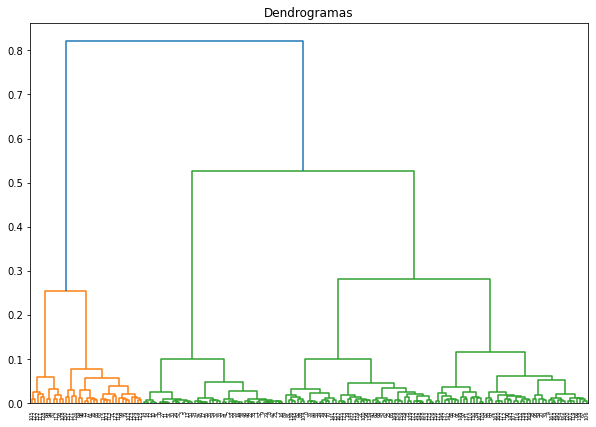

In [13]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrogramas") 
dendrograma = shc.dendrogram(shc.linkage(X, method = 'ward'))

El dendrograma nos permite visualizar que en grupo de datos de colores narajan se encuntra mas apartado del resto de los datos, tambien podemos obsersar que la distancia de entre los puntos entre los grupos 3 grupos verdes es similar a la distancia entre la combinacion de estos y el grupo naranja. Despues de analizar las distancian entre los grupos de datos se tomo la decision de que 'K' tenga el valor de 3 al existir una mayor distancia entre los grupos.

Definir el algoritmo junto con el valor de K

In [20]:
algoritmo = AgglomerativeClustering(n_clusters = 3, 
                                    affinity='euclidean', linkage='ward')

Entrenar el Algoritmo

In [21]:
algoritmo.fit(X)
pred1 = algoritmo.fit_predict(X)

Utilicemos los datos de muestras y verifiquemos en que cluster se encuentran

In [22]:
muestra_prediccion = algoritmo.fit_predict(muestras_escalada)

for i, pred in enumerate(muestra_prediccion):
    print( "Muestra", i, "se encuentra en el clúster:", pred)

Muestra 0 se encuentra en el clúster: 1
Muestra 1 se encuentra en el clúster: 2
Muestra 2 se encuentra en el clúster: 0


El medolo Jerarquico adiferencia del metodo Kmeans no suele usarse con muestras muy grandes debido a que es sensible a los valores atipicos, mientras el otro metodo usa valores medios. El metodo de jerarquico se pueden encontrar similitudes atraves de caracteristicas innesperadas, mientras Kmeans es mas facil de implementar indenpendiente del tamaño del Dataset. Ambas tecnicas nos dieron como resultado una cantidad distintas de clusters tomando en cuenta este dato se es posible afirmar el que datos comparados en el metodo Kmeans sean mas acertivos que los datos por el metodo Jerarquico.  